In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
df = pd.read_csv('traffic_data.csv')
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [16]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [17]:
df.tail()

,DateTime,Junction,Vehicles,ID
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


In [5]:
df.shape

(48120, 4)

In [18]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df.drop(["ID"], axis = 1)
df

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [9]:
df.describe()

,DateTime,Junction,Vehicles
count,48120,48120.000000,48120.000000
mean,2016-09-19 06:03:56.109725696,2.180549,22.791334
min,2015-11-01 00:00:00,1.000000,1.000000
25%,2016-04-16 01:45:00,1.000000,9.000000
50%,2016-09-30 03:30:00,2.000000,15.000000
75%,2017-02-25 16:00:00,3.000000,29.000000
max,2017-06-30 23:00:00,4.000000,180.000000
std,NaN,0.966955,20.750063


Text(0.5, 0, 'Date')

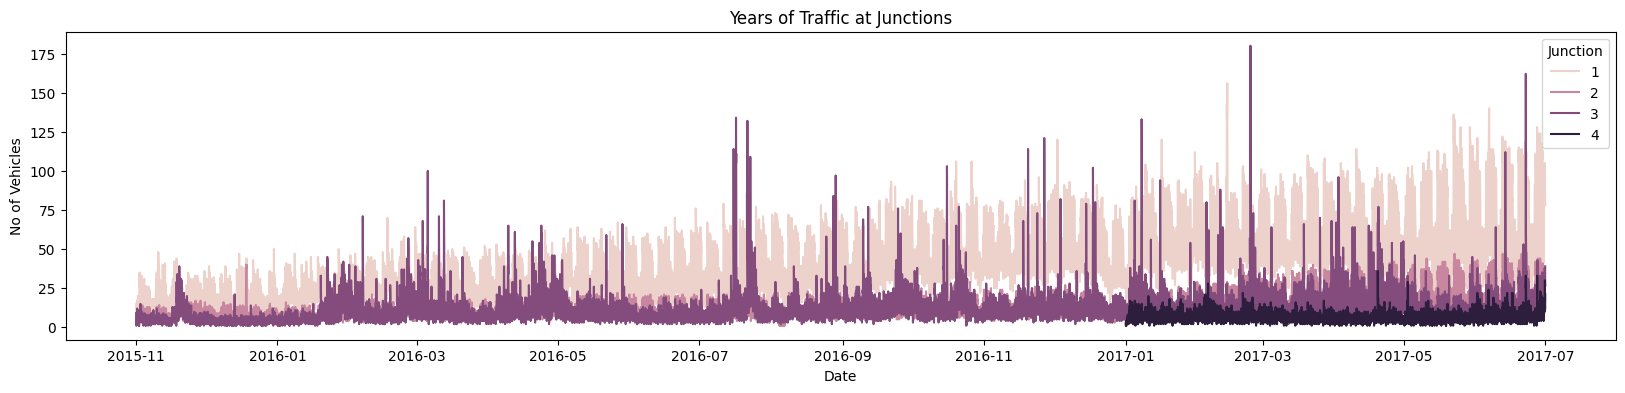

In [10]:
plt.figure(figsize = (20,4))
Time_series = sns.lineplot(x = df['DateTime'], y = "Vehicles", data = df, hue = "Junction")
Time_series.set_title("Years of Traffic at Junctions")
Time_series.set_ylabel("No of Vehicles")
Time_series.set_xlabel("Date")

In [22]:
df["Year"] = df['DateTime'].dt.year
df["Month"] = df['DateTime'].dt.month
df["Date No"] = df['DateTime'].dt.day
df["Hour"] = df['DateTime'].dt.hour
df["Day"] = df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date No,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


In [23]:
df = df.drop(['DateTime'], axis = 1)
df

,Junction,Vehicles,Year,Month,Date No,Hour,Day
0,1,15,2015,11,1,0,Sunday
1,1,13,2015,11,1,1,Sunday
2,1,10,2015,11,1,2,Sunday
3,1,7,2015,11,1,3,Sunday
4,1,9,2015,11,1,4,Sunday
...,...,...,...,...,...,...,...
48115,4,11,2017,6,30,19,Friday
48116,4,30,2017,6,30,20,Friday
48117,4,16,2017,6,30,21,Friday
48118,4,22,2017,6,30,22,Friday


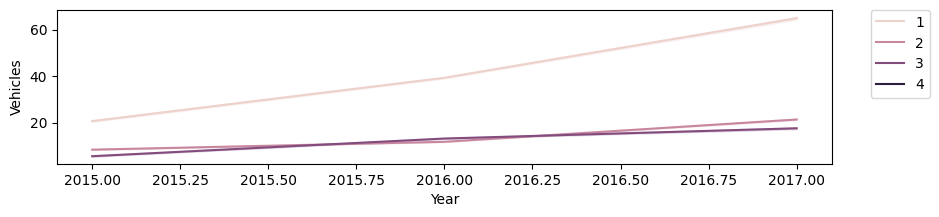

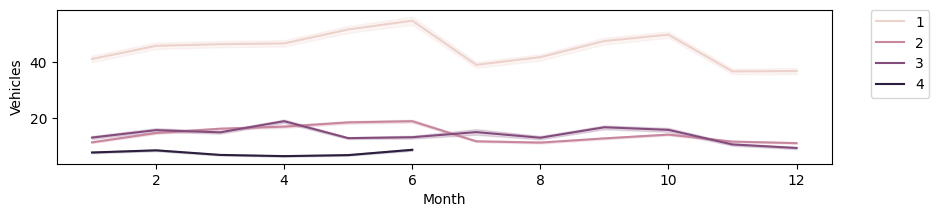

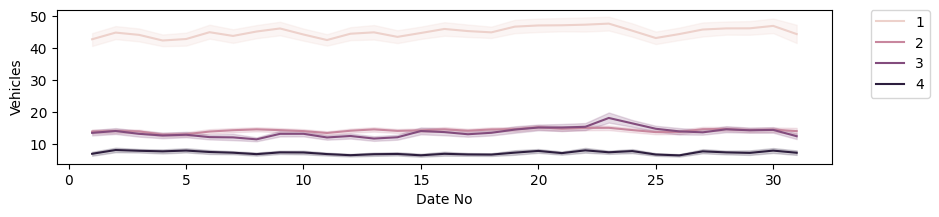

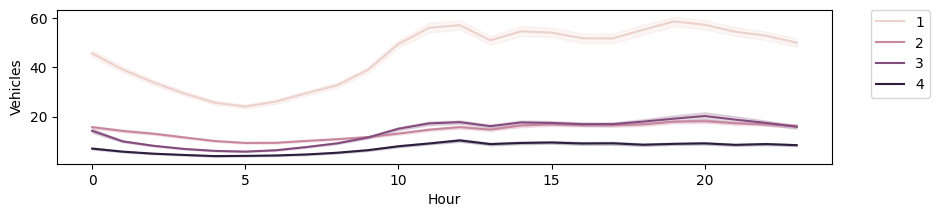

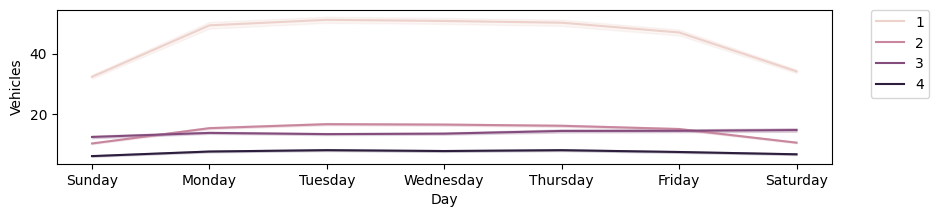

In [13]:
new_features = [ "Year","Month", "Date No", "Hour", "Day"]  
for i in new_features:
    plt.figure(figsize=(10,2))
    sns.lineplot(x = df[i], y = "Vehicles", data = df, hue = "Junction")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

Text(0.5, 0, 'Date')

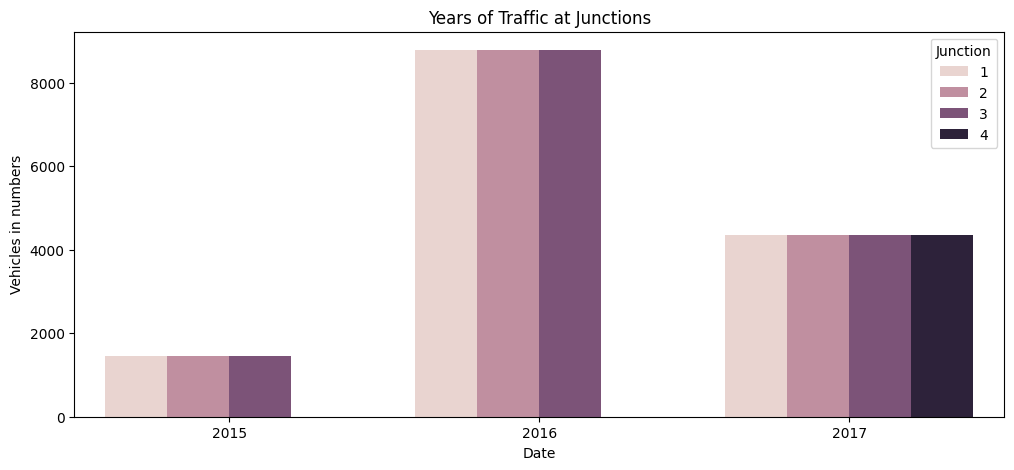

In [14]:
plt.figure(figsize = (12,5))
count = sns.countplot(x = df['Year'], data = df, hue = "Junction")
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date")

In [24]:
df = df.drop(['Day'], axis = 1)
df

,Junction,Vehicles,Year,Month,Date No,Hour
0,1,15,2015,11,1,0
1,1,13,2015,11,1,1
2,1,10,2015,11,1,2
3,1,7,2015,11,1,3
4,1,9,2015,11,1,4
...,...,...,...,...,...,...
48115,4,11,2017,6,30,19
48116,4,30,2017,6,30,20
48117,4,16,2017,6,30,21
48118,4,22,2017,6,30,22


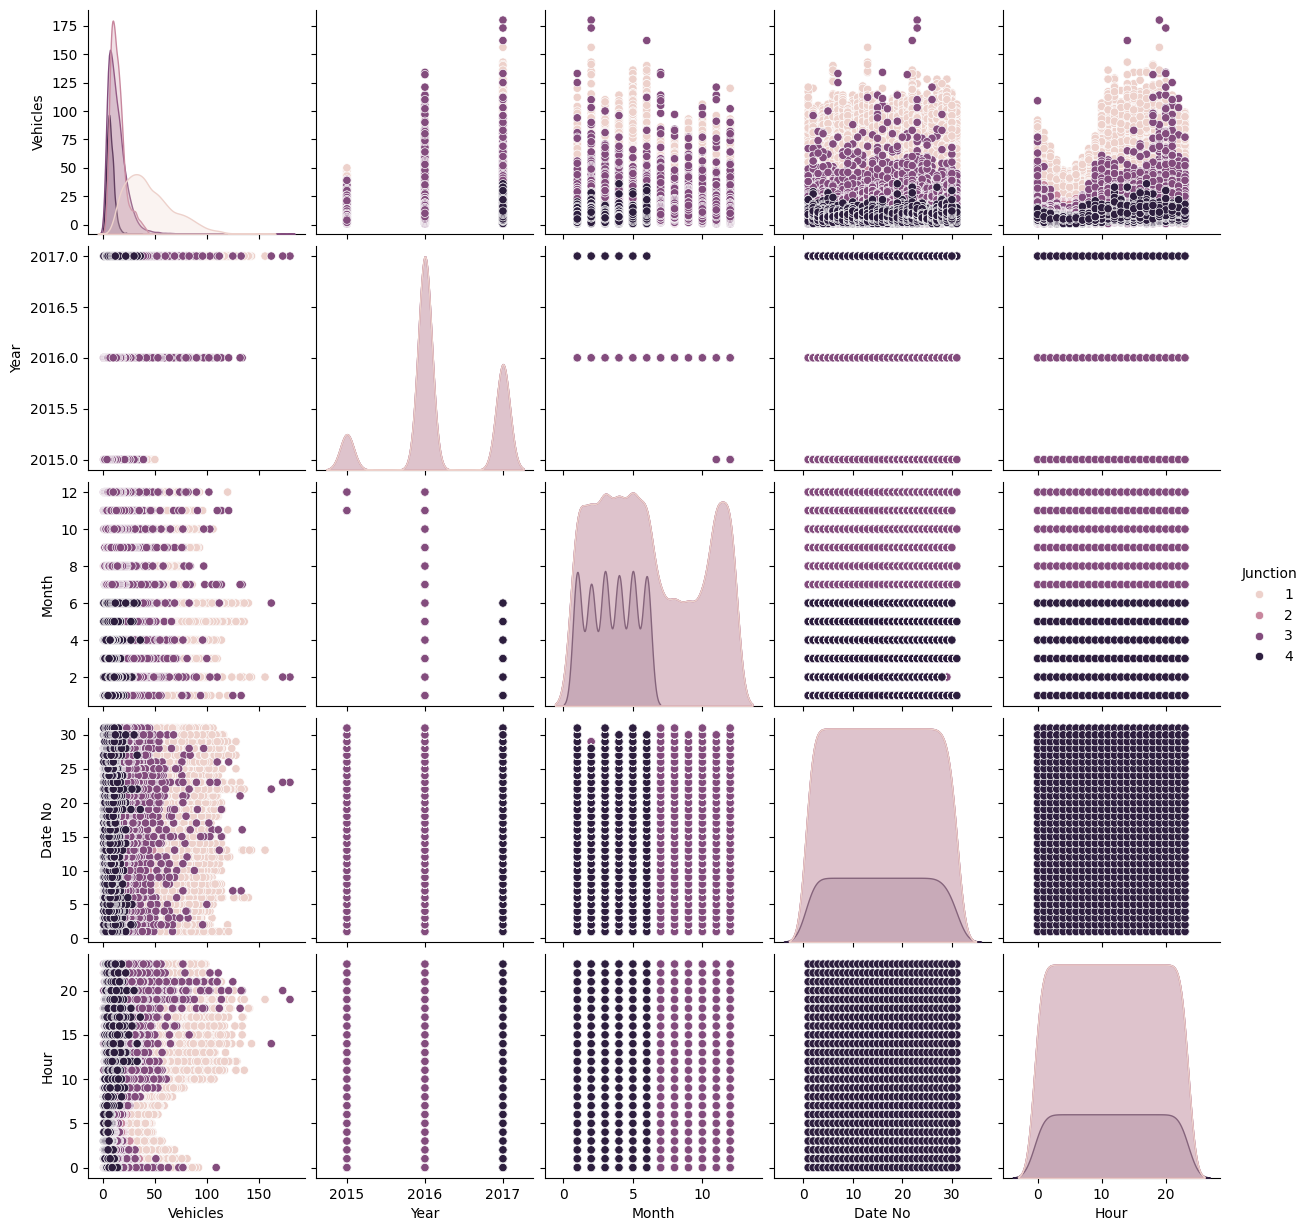

In [16]:
sns.pairplot(data = df, hue = "Junction")

In [25]:
df.corr()

,Junction,Vehicles,Year,Month,Date No,Hour
Junction,1.000000e+00,-0.613787,2.212977e-01,-1.242771e-01,-2.094621e-03,-2.132575e-15
Vehicles,-6.137872e-01,1.000000,2.212531e-01,-2.272345e-02,2.789498e-02,2.199377e-01
Year,2.212977e-01,0.221253,1.000000e+00,-6.234957e-01,-7.474779e-03,7.732006e-16
Month,-1.242771e-01,-0.022723,-6.234957e-01,1.000000e+00,9.154760e-03,4.953278e-16
Date No,-2.094621e-03,0.027895,-7.474779e-03,9.154760e-03,1.000000e+00,-9.917806e-18
Hour,-2.132575e-15,0.219938,7.732006e-16,4.953278e-16,-9.917806e-18,1.000000e+00


<Axes: >

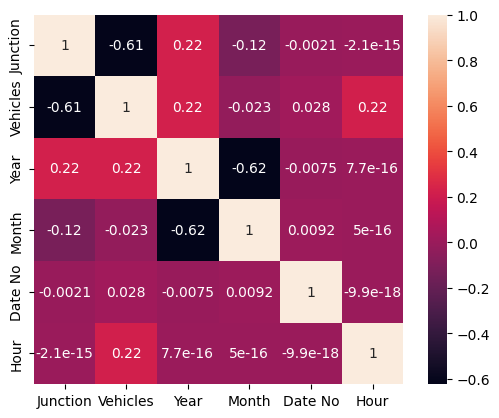

In [18]:
sns.heatmap(df.corr(), annot = True, square = True)

In [14]:
df['Vehicles'].value_counts()

Vehicles
8      2325
9      2290
7      2220
6      2206
10     2145
       ... 
129       1
141       1
135       1
143       1
162       1
Name: count, Length: 141, dtype: int64

In [16]:
df.describe()

,Junction,Vehicles,Year,Month,Date No,Hour
count,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,2016.269825,5.884289,15.700748,11.500000
std,0.966955,20.750063,0.616093,3.569872,8.784073,6.922258
min,1.000000,1.000000,2015.000000,1.000000,1.000000,0.000000
25%,1.000000,9.000000,2016.000000,3.000000,8.000000,5.750000
50%,2.000000,15.000000,2016.000000,5.000000,16.000000,11.500000
75%,3.000000,29.000000,2017.000000,9.000000,23.000000,17.250000
max,4.000000,180.000000,2017.000000,12.000000,31.000000,23.000000


In [26]:
X = df.drop(columns = 'Vehicles', axis = 1) 
Y = df['Vehicles'] 

In [27]:
print(X)

       Junction  Year  Month  Date No  Hour
0             1  2015     11        1     0
1             1  2015     11        1     1
2             1  2015     11        1     2
3             1  2015     11        1     3
4             1  2015     11        1     4
...         ...   ...    ...      ...   ...
48115         4  2017      6       30    19
48116         4  2017      6       30    20
48117         4  2017      6       30    21
48118         4  2017      6       30    22
48119         4  2017      6       30    23

[48120 rows x 5 columns]


In [28]:
print(Y)

0        15
1        13
2        10
3         7
4         9
         ..
48115    11
48116    30
48117    16
48118    22
48119    12
Name: Vehicles, Length: 48120, dtype: int64


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(48120, 5) (38496, 5) (9624, 5)


In [33]:
print(Y.shape, Y_train.shape, Y_test.shape)

(48120,) (38496,) (9624,)


In [40]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [41]:
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [46]:
Y_train_prediction = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_train_prediction)
rmse_train = mean_squared_error(Y_train, Y_train_prediction, squared = False)
mae_train = mean_absolute_error(Y_train, Y_train_prediction)
r2_train = r2_score(Y_train, Y_train_prediction)

print("Evaluation on Train data")
print(f"Mean Squared Error: {mse_train}")
print(f"Root Mean Squared Error: {rmse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R2 Score: {r2_train}")

Evaluation on Train data
Mean Squared Error: 2.809984211346633
Root Mean Squared Error: 1.6763007520569313
Mean Absolute Error: 1.0730709684123025
R2 Score: 0.9935590107067792


In [47]:
Y_test_prediction = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_prediction)
rmse_test = mean_squared_error(Y_test, Y_test_prediction, squared = False)
mae_test = mean_absolute_error(Y_test, Y_test_prediction)
r2_test = r2_score(Y_test, Y_test_prediction)
print("Evaluation on Test data")
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {rmse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R2 Score: {r2_test}")

Evaluation on Test data
Mean Squared Error: 18.366626423524522
Root Mean Squared Error: 4.285630224777275
Mean Absolute Error: 2.8641843308395676
R2 Score: 0.9549336936274255


In [49]:
input_data = (3, 2016, 9, 25, 4)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[10.3]


c:\users\sayan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [52]:
input_data = (4, 2019, 7, 15, 19)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[6.88]


c:\users\sayan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
